# Least squares

The following is an example from Lecture 06.

The result of census of the population of Switzerland between 1900 and 2010 (in thousands) is summarized in the following table:

|	year	|	population	|
|-----------|---------------|
|	1900	|	3315	|
|	1910	|	3753	|
|	1920	|	3880	|
|	1930	|	4066	|
|	1941	|	4266	|
|	1950	|	4715	|
|	1960	|	5429	|
|	1970	|	6270	|
|	1980	|	6366	|
|	1990	|	6874	|
|	2000	|	7288	|
|	2010	|	7783	|


* Is it possible to estimate the number of inhabitants of Switzerland
during the year when there has not been census, for example in 1945
and 1975?

* Is it possible to predict the number of inhabitants of Switzerland in
2020?

501596.6994081075 -549.8998019168754 0.1513877128805333
4745.087199664209
6051.288176908856
8521.523173747235


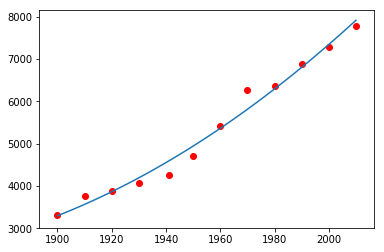

In [18]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

assert len(year) is len(population)
n = len(year)
B = matrix([ones(n), year, year**2]).T
BT = B.T

y = matrix(population).T

a = linalg.solve(BT*B, BT*y)
a0 = float(a[0])
a1 = float(a[1])
a2 = float(a[2])
print(a0, a1, a2)

xx = linspace(1900,2010,100)
f = lambda x: a0 + a1*x + a2*x**2

_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')



print(f(1945))
print(f(1975))
print(f(2020))

In [2]:
#Exercises:
#1a) change the value of m=2, defining a general function for different values of m
#1b) compare with interpolation and discuss the difference between the two
#2)Let us assume you have gaussian noise N(0,sigma^2), so you have (x_i,y_i)-->(x_i,y_i+err_i).
#How does the error change the coefficients? Give E[a_i], VAR[a_i] --> compute many samples!
#change the value of sigma

[[ 5.01596699e+05]
 [-5.49899802e+02]
 [ 1.51387713e-01]]


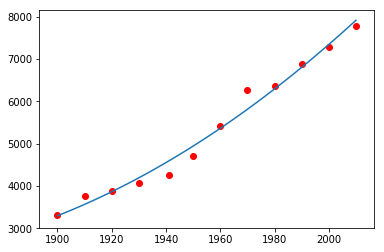

In [19]:
#Exercise 1a)

year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])


def ls(m,data,measures):
    
    if m >= len(data):
        raise RuntimeError("m must be strictly smaller than len(data)")

    assert len(data) is len(measures)
    n = len(data)
    pippo = [ones(n)]
    for i in range(1,m+1):
        pippo.append(data**i)
        
    B = matrix(pippo).T
    BT = B.T

    y = matrix(measures).T

    a = linalg.solve(BT*B, BT*y)
    #a0 = float(a[0])
    #a1 = float(a[1])
    #a2 = float(a[2])
    #print(a0, a1, a2)
    return a

coefficients = ls(2,year,population)   

print(coefficients)
    
xx = linspace(1900,2010,100)
#f = lambda x: a0 + a1*x + a2*x**2

_ = plot(xx,np.polyval(coefficients[::-1],xx))
_ = scatter(year, population, color='r')

In [21]:
#Exercise 1b)

def Lagrange_basis(points):

    x = linspace(0,1,ref)
    n = len(points)
    Ln = zeros((ref, n+1))
    
    
    for i in range(n+1):
        Ln[:,i] = product([ (x-points[j])/(points[i]-points[j]) for j in range(n+1) if j != i], axis=0)
        
    return Ln

#Lagrange_year = Lagrange_basis(1025,year)

#_ = plot(year, Lagrange_year)

NameError: name 'x' is not defined